# Lab 1: Part B: Maximum a Posteriori
In this part of the lab we will be using maximum a posteriori (MAP). This allows us to introduce prior information we may have about the parameters. We shall use the Normal Inverse Gamma as our conjugate prior.

PLEASE limit your use of built-in functions, so use built-in gamma that we mentioned in class if you like, but not more complicated or convenience functions like `scipy.stats.norm.pdf` etc.

In [2]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 25)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from normal_inv_gamma import *
from plot_normal import *

In [9]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 1  # standard deviation = sqrt(variance)
N = 5      # number of datapoints

X = mu + sigma*np.random.randn(N,1)

5

In [30]:
# hyperparameters for prior - normal inverse gamma
alpha = 1
beta = 1
gamma = 1
delta = 0

## MAP Parameter Estimation of univariate normal

### TODO 1 
On paper derive (or consult the lecture notes for) the MAP parameter estimates for the normal distribution using the normal inverse gamma prior and then insert the equations below.

In [32]:
# Change the zeros to their appropriate equations.
muML = np.sum(X)/N
sigmaML = np.sqrt(np.sum((X-muML)**2/N))
muMAP = (np.sum(X) + (gamma*delta))/(N+gamma)
sigmaMAP = np.sqrt((np.sum((X-muMAP)**2)+ 2*beta + gamma * ((delta-muMAP)**2))/(N+3+2*alpha))

In [34]:
print(muMAP)
print(sigmaMAP)

0.948206463749305
0.715424228351139


## Empirical Confirmation

Now the fun part! You've now calculated the closed form solution for maximum a posteriori. We're now going to compare with the brute force solution.

### Note
Again the __TODOs__ are calling for you to dig into the functions called within the for-loops. You should have already completed the function `normal` in `prac1_a`. 


### TODO 2
Compute the probability density for the prior: See `normal_inv_gamma.py`

In [36]:
# Domain of likelihood function
sigma_range = np.linspace(0.02, 2., num=200)
mu_range = np.linspace(-2., 2., num=400)

# Brute force compute the likelihood prior functions
lfun = np.zeros((len(sigma_range), len(mu_range)))
prior = np.zeros((len(sigma_range), len(mu_range)))

for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)
        prior[j,i] = normal_inv_gamma(alpha, beta, delta, gamma, m, s)

### TODO 4 
Last step! Compute the posterior using Bayes rule.

In [90]:
# Change the zero to its appropriate equation.
posterior = 0

### TODO 5
Empirically verify that the maximum of the posterior is at the same position as your MAP solution.

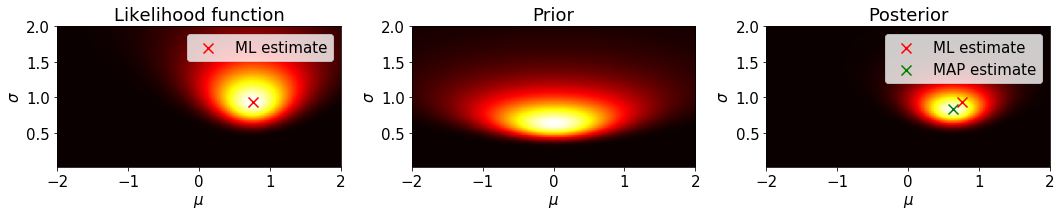

In [92]:
# Plot likelihood function
plt.subplot(1,3,1)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.legend()



# Plot prior
plt.subplot(1,3,2)
plt.imshow(prior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Prior")



# Plot posterior
plt.subplot(1,3,3)
plt.imshow(posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Posterior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()


# Prevent subplots from bunching up
plt.tight_layout()

### TODO 6
Comment on the effects of introducing the prior as the number of datapoints is low as compared to high
 